## 1. Le modèle 

### 1.1 Principe

La régression logistique est un méthode d'apprentissage supervisée très utile pour expliquer / prédire une variable discrète (à l'opposé de continu) lorsque le jeu de données comporte de nombreuses variables catégorielles.

### 1.2 Notations

Soit Y la variable à prédire / expliquée (dans notre cas, il s'agit de la souscription ou non à l'option de deposit à long terme) et X = (X1, X2, ..., Xn) les variables explicatives

Dans le cadre de la regression logistique binaire, la variable Y prend deux modalités {0,1}. Les variables $X_{i}$ sont exclusivement binaires ou continues.

- Soit $\Omega$ un ensemble de n échantillons (ici n = 45211) comportant $n_{1}$ (respectivement $n_{0}$)) observations correspondant à la modalité 1 (respectivement 0) de Y (dans notre cas, $n_{1}$ = 5289 et $n_{0}$ = 39922).
- $P(Y=1)$ est la probabilité a priori pour que Y = 1. Pour simplifier on la notera p(1)
- $p(X \vert 1)$ est la distribution conditionnelle des X sachant la valeur prise par Y. 
- La probabilité a posteriori d'obtenir la modalité 1 de Y (resp. 0) sachant la valeur prise par X est $p(1 \vert X)$ (resp. $p(0 \vert X)$)


### 1.3 Le modèle LOGIT

On désigne par le terme LOGIT de $p(1 \vert X)$ l'expression suivante: $\ln {\frac  {p(1\vert X)}{1-p(1\vert X)}}=b_{0}+b_{1}x_{1}+...+b_{n}x_{n}$

- il s'agit bien d'une regression car on cherche à montrer une relation de dépendance entre une variable à expliquer tet une série de variables explicatives
- il s'agit d'une regression logistique car la loi de probabilité est modélisée par une loi logistique (https://fr.wikipedia.org/wiki/Fonction_logistique_(Verhulst))

#### Q.1 Pourquoi la fonction logistique est-elle intéressante ? Notamment par rapport à une fonction affine 

Réponse: Elle est beaucoup moins sensible aux outliers dans le cas d'une classification binaire

Expliquer / prédire une variable binaire consiste alors à estimer au mieux les coefficients $b_{i}$ ci-dessus. Ensuite on peut retrouver la probabilité conditionnelle par la formule suivante: 

$p(1\vert X)={\frac  {e^{{b_{0}+b_{1}x_{1}+...+b_{n}x_{n}}}}{1+e^{{b_{0}+b_{1}x_{1}+...+b_{n}x_{n}}}}}$

Il existe plusieurs méthodes de resolutions / d'estimations de ces paramètres (voir principe du maximum de vraisemblance et algo méthode de résolution numérique Newton-Raphson). Nous allons nous concentrer plus sur l'interprétation des résultats dans le cas d'une classification plutot que sur les méthodes de résolution.

## 2. Implémentation

### 2.1 Import des librairies et du jeu de données

In [1]:
pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
from Preprocessing import preprocessing
import statsmodels.api as sm
from sklearn import linear_model

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

On réutilise le jeu de données sur le marketing dans la banque

In [3]:
df = pd.read_csv('data/bank-full.csv',  sep = ";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### 2.2 Preprocessing des données (voir le package en détails)

Comme précisé plus haut, on a besoin de variables exclusivement binaires ou continues. 

#### Q.2 Quel type d'encoding des variables catégorielles doit-on mettre en place pour ce faire ? 

Réponse: One-hot encoding (chaque modalité de variables multicatégorielles est transformée en variable binaire)

#### Consigne 1: Mettre en place cet encoding 

Vous pouvez faire cet encoding directement via des instructions dans le notebook. Mais le mieux étant de créer un package dans un script python en dehors du notebook pour faire ce processing et appeler ensuite ce package dans le notebook (comme si vous appeliez un package de pandas ou numpy)

In [4]:
#La variable à prédire est y_bin (construite à partir de y)
#Les variables numériques sont: age, balance, day (à voir si on ne la transforme pas en catégorielle), duration, campaign, pdays, previous
#Les variables catégorielles binaires sont: default, housing, loan
#Les varaibles multi-catégorielles non ordinales sont: job, marital, education, contact, month, poutcome
from Preprocessing import preprocessing

var_bin = ["default", "housing", "loan", "y"]
var_cat = ["job","marital", "education", "contact", "month", "poutcome"]

df_prep = preprocessing(df, var_bin, var_cat)

In [5]:
df_prep.head()

,age,balance,day,duration,campaign,pdays,previous,default_bin,housing_bin,loan_bin,y_bin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


#### Introduire une étape de normalisation 

On regarde la distribution des variables explicatives, pour regarder les différences d'échelles

In [6]:
df_prep.mean()

age                      40.936210
balance                1362.272058
day                      15.806419
duration                258.163080
campaign                  2.763841
pdays                    40.197828
previous                  0.580323
default_bin               0.018027
housing_bin               0.555838
loan_bin                  0.160226
y_bin                     0.116985
job_blue-collar           0.215257
job_entrepreneur          0.032890
job_housemaid             0.027427
job_management            0.209197
job_retired               0.050076
job_self-employed         0.034925
job_services              0.091880
job_student               0.020747
job_technician            0.168034
job_unemployed            0.028820
job_unknown               0.006370
marital_married           0.601933
marital_single            0.282896
education_secondary       0.513194
education_tertiary        0.294198
education_unknown         0.041074
contact_telephone         0.064276
contact_unknown     

On applique alors une normalisation des données de type min max afin d'avoir toutes les variables entre 0 et 1. En l'occurence, cela n'apportera pas énormément dans le sens ou l'on veut appliquer une regression logistique (moins sensible aux échelles) mais il serait primordial d'en mettre une en place si on appliquait un modèle linéaire.

In [7]:
df_norm = (df_prep - df_prep.min()) / (df_prep.max() - df_prep.min())
df_norm.head()

,age,balance,day,duration,campaign,pdays,previous,default_bin,housing_bin,loan_bin,y_bin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0.092259,0.133333,0.053070,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.337662,0.073067,0.133333,0.030704,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.194805,0.072822,0.133333,0.015453,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.376623,0.086476,0.133333,0.018707,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.194805,0.072812,0.133333,0.040260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
df_norm.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'default_bin', 'housing_bin', 'loan_bin', 'y_bin', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [9]:
liste_df_norm = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'default_bin', 'housing_bin', 'loan_bin', 'y_bin', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown']

In [10]:
# Separate features and labels
features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'default_bin', 'housing_bin', 'loan_bin', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown']
label = 'y_bin'
X, y = df_prep[features].values, df_prep[label].values

for n in range(0,4):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [58, 2143, 5, 261, 1, -1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1] 
  Label: 0
Patient 2 
  Features: [44, 29, 5, 151, 1, -1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1] 
  Label: 0
Patient 3 
  Features: [33, 2, 5, 76, 1, -1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1] 
  Label: 0
Patient 4 
  Features: [47, 1506, 5, 92, 1, -1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1] 
  Label: 0


#### Consigne 2: Séparer l'échantillon de données en base d'apprentissage et base de test (70% / 30%)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))
print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

(30291, 42) (14920, 42) (30291,) (14920,)
Training cases: 30291
Test cases: 14920


In [12]:
#linear_model.LogisticRegression?

Notre dataset ne contient pas beaucoup d'observations (seulement quelques dizaines de milliers), on peut donc se dire qu'un solver liblinear serait approprié pour résoudre un tel problème.

In [13]:
model = linear_model.LogisticRegression(penalty='l1', tol=0.001, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear', tol=0.001)

In [14]:
print(model.intercept_, model.coef_)

[-1.8006728] [[-4.92853615e-03  9.31308168e-06  6.60631859e-03  4.19132103e-03
  -9.39830120e-02 -5.04360220e-04  1.86054462e-02  0.00000000e+00
  -7.46004777e-01 -4.22057523e-01 -3.21217986e-01 -2.85737347e-01
  -3.98840774e-01 -1.66977083e-01  2.85575325e-01 -2.83996812e-01
  -2.41904057e-01  2.11153424e-01 -2.12879850e-01 -1.73383396e-01
  -4.19771473e-01 -2.76147221e-01 -1.49560718e-02  1.52940437e-01
   3.18273864e-01  1.31670924e-01 -6.01059153e-02 -1.59565117e+00
  -8.55290950e-01  3.99962611e-01 -4.04727770e-01 -1.42201752e+00
  -1.01846234e+00  1.65965715e-01  1.30319515e+00 -5.85629442e-01
  -1.00117942e+00  7.99026903e-01  6.82012900e-01  1.39975102e-01
   2.25655669e+00 -2.26623252e-01]]


#### Consigne 4: Faire des prédictions sur l'échantillon de test

In [15]:
y_pred_test = model.predict(X_test)

En faisant des prédictions sur l'échantillon de test, on se rend compte que le modèle prédit deux fois moins de personnes susceptibles de prédire qu'il y en a dans l'échantillon. Le modèle a tendance a être "frileux" (prédire moins de 1 que de 0) pour avoir une meilleur accuracy. Il est possible de changer ça en jouant sur l'hyperparamètre class_weight

In [16]:
pd.DataFrame(y_pred_test, columns = ["pred"]).pred.value_counts().apply(lambda x: x/len(y_pred_test))

0    0.936327
1    0.063673
Name: pred, dtype: float64

### 2.4 Analyse des différentes métriques

#### Consigne 5: Créez une matrice de confusion pour analyser les résultats

In [17]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, y_pred_test)
cm_test

array([[12830,   345],
       [ 1140,   605]], dtype=int64)

#### Q.3: Combien a-t'on de TP (True Positif), TN (True Negatif), FP (False Positive) et FN (False Negative) ? 

In [18]:
tn, fp, fn, tp = cm_test.ravel()
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)
print("True Positive", tp)

True Negative 12830
False Positive 345
False Negative 1140
True Positive 605


#### Q.4 Quelle est l'accuracy du modèle ? Sa précision ? Son recall ? Son F-1 score ?

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("accuracy", round(accuracy_score(y_test, y_pred_test),4))
print("accuracy", (tp + tn)/ len(y_test))
#Sans normalisation: 0.90

accuracy 0.9005
accuracy 0.9004691689008043


In [20]:
#Parmi les personnes indiquées par le modèle comme ayant souscrit à l'offre, 63% ont en effet bien souscrit à l'offre.
print("precision", round(precision_score(y_test, y_pred_test),4))
print("precision", tp/(tp+fp))
#Sans normalisation: 0.64

precision 0.6368
precision 0.6368421052631579


In [21]:
#Le recall correspond à la capacité du modèle d'identifier l'ensemble des personnes ayant souscrit (il a réussi à en repérer 35%)
#Parmi l'ensemble des gens ayant souscrit à l'offre, seulement
print("recall", round(recall_score(y_test, y_pred_test),4))
print("recall", tp/(tp+fn))
#Sans normalisation: 0.35

recall 0.3467
recall 0.3467048710601719


In [22]:
print("f1-score", f1_score(y_test, y_pred_test))

f1-score 0.44897959183673464


In [23]:
from sklearn import metrics 
import matplotlib.pyplot as plt

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test)
roc_auc = metrics.auc(fpr, tpr)

#### Regression grâce à predict proba

In [24]:
#Cette série représente les prédictions estimant la probabilité que les clients de la base de test souscrient au dépôt de long terme
y_pred_test_proba = model.predict_proba(X_test)
y_pred_test_proba[:,1]

array([0.00837752, 0.02823009, 0.19922482, ..., 0.04707354, 0.31975219,
       0.2828761 ])

In [25]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test_proba[:,1])
roc_auc = metrics.auc(fpr, tpr)

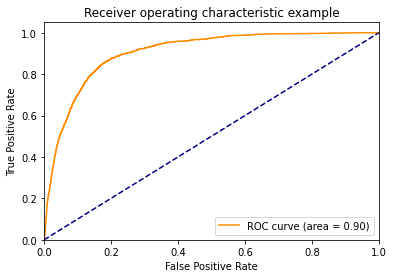

In [26]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### Consigne 7: Faire des prédictions sur l'échantillon d'apprentissage et calculer toutes les métriques ci-dessus

### Evaluer la précision du modèle

On va jouer sur deux hyperparamètres qui nous semblent pertinents: le solver et la pondération des classes

On peut se permettre de faire une gridsearchCV pour tester toutes les combinaisons possibles car il n'y en a que 6.

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# define parameter values
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none', 'l1', 'l2', 'elasticnet']
class_weight_options = [None, 'balanced']
c_values = [100, 10, 1.0, 0.1, 0.001]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values, class_weight = class_weight_options)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='f1', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print(f"Best score f1 on training data: {grid_result.best_score_} using {grid_result.best_params_}")

Best score f1 on training data: 0.5521324552077089 using {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


In [28]:
print(f'Score on test data: {accuracy_score(grid_result.predict(X_train),y_train)}')

Score on test data: 0.8454326367567925


In [29]:
from sklearn.metrics import classification_report

grid_pred = grid_result.predict(X_test)
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91     13175
           1       0.42      0.82      0.55      1745

    accuracy                           0.85     14920
   macro avg       0.70      0.83      0.73     14920
weighted avg       0.91      0.85      0.87     14920



In [30]:
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, grid_pred).round(2))


Accuracy:  0.85


In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Overall Precision:",precision_score(y_test, grid_pred))
print("Overall Recall:",recall_score(y_test, grid_pred))
print("F1 SCore:",f1_score(y_test, grid_pred))

Overall Precision: 0.4186658864833236
Overall Recall: 0.8200573065902579
F1 SCore: 0.5543288785589774


In [32]:
# Print the confusion matrix
cm = confusion_matrix(y_test, grid_pred)
print (cm)

[[11188  1987]
 [  314  1431]]


In [33]:
y_scores = grid_result.predict_proba(X_test)
print(y_scores)

[[0.96711114 0.03288886]
 [0.88016665 0.11983335]
 [0.32907507 0.67092493]
 ...
 [0.7627841  0.2372159 ]
 [0.24433199 0.75566801]
 [0.20785893 0.79214107]]


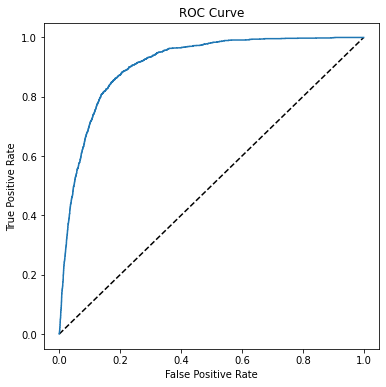

In [34]:
from sklearn.metrics import roc_curve

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [35]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
#auc.round(2)
print('AUC: ' + str(auc.round(2)))

AUC: 0.91


On crée enfin un dataframe compilant les résultats afin de pouvoir comparer les différentes combinaisons d'hyperparamètres testées

In [36]:
df_results = pd.DataFrame(grid_result.cv_results_)
df_results.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,10.914764,0.423270,0.010806,0.001044,100,None,none,newton-cg,"{'C': 100, 'class_weight': None, 'penalty': 'n...",0.430427,0.465580,0.444236,0.464776,0.467273,0.454458,0.014672,37
1,1.467509,0.143891,0.012503,0.003772,100,None,none,lbfgs,"{'C': 100, 'class_weight': None, 'penalty': 'n...",0.300412,0.303901,0.355330,0.339896,0.330544,0.326017,0.021058,49


In [37]:
import pickle
pickle.dump( grid_result, open("models/bank_model.pkl", "wb" ) )

In [38]:
grid_result = pickle.load( open("models/bank_model.pkl", "rb" ) )

In [39]:
X_new = np.array([[44, 29, 5, 261, 1, -1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]])
print ('New sample: {}'.format(list(X_new[0])))
print(type(X_new))

New sample: [44, 29, 5, 261, 1, -1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
<class 'numpy.ndarray'>


In [40]:
# Get a prediction
pred= grid_result.predict(X_new)

In [41]:
# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one patient, so our prediction is the first one in the resulting array.
print('Predicted class is {}'.format(pred[0]))

Predicted class is 0
